## Домашнее задание по блоку 29.03.2021. Визуализация данных
### Тихонова Инна

**Обязательная часть**

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:
 - построить не менее 4 визуализаций различных видов;
 - каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
 - по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
 
**Дополнительная часть (необязательная)**
 - построить дополнительно не менее 2 визуализаций (итого не менее 6);
 - в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix; 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

### 1. Датасет "Кандидаты и информация о них"

Источник: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

**Описание полей**

 - enrollee_id : уникальный ID кандидата,
 - city: код города,
 - city_development_index : уровень города по шкале от 0 до 1,
 - gender: пол кандидата,
 - relevent_experience: релевантный опыт кандидата,
 - enrolled_university: тип образования кандидата - очное/заочное/нет,
 - education_level: образование кандидата,
 - major_discipline : специальность кандидата,
 - experience: общий стаж работы кандидата,
 - company_size: количество сотрудников в текущей компании кандидата,
 - company_type : область текущей компании кандидата,
 - last_new_job: стаж работы на текущем месте кандидата в годах,
 - training_hours: количество часов, потраченных на курсы,
 - target: 
     - 0 – не ищет работу, 
     - 1 – ищет работу.
     
Большинство полей категориальные.     

In [2]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Для возможности отрисовки большего количества графиков обогатим данные - добавим числовые колонки для:
 - стажа работы,
 - количества лет на текущем месте работы. 

In [4]:
def set_experience(exp):
    if exp == '<1':
        return 0
    elif exp == '>20':
        return 25
    elif not pd.isna(exp):
        return exp
    return 0

df['exp_years'] = df['experience'].apply(set_experience).astype('int')

In [5]:
def set_job_years(count):
    if count == 'never':
        return 0
    elif count == '>4':
        return 5
    elif not pd.isna(count):
        return count
    return 0

df['job_years'] = df['last_new_job'].apply(set_job_years).astype('int')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,exp_years,job_years
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,25,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,15,5
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,5,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,25,4


### 2. Графики (1-3)

#### 2.1. Образование кандидатов с разбивкой по полу

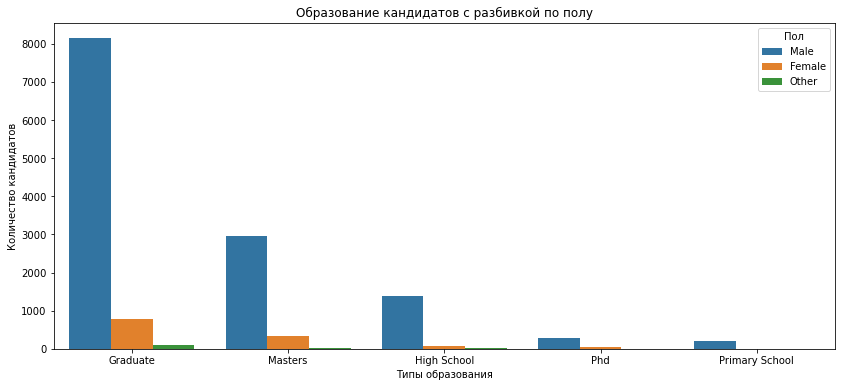

In [7]:
sns.countplot(data = df, x = 'education_level', hue = 'gender')

plt.title('Образование кандидатов с разбивкой по полу')
plt.ylabel('Количество кандидатов')
plt.xlabel('Типы образования')
plt.legend(title='Пол')

plt.show()

Выводы: 
 - подавляющее большинство кандидатов из датасета имеют высшее образование,
 - подавляющее большинство кандидатов из датасета - мужчины.

#### 2.2. Время на обучение. Стаж работы

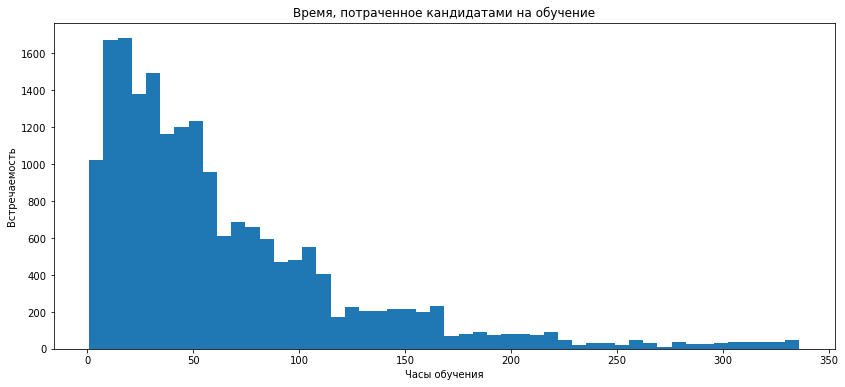

In [19]:
sns.distplot(df['training_hours'], kde = False, hist_kws = {"alpha": 1})
plt.title('Время, потраченное кандидатами на обучение')
plt.xlabel('Часы обучения')
plt.ylabel('Встречаемость')
plt.show()

Вывод: большая часть кандидатов проходят один-два курса (из расчета один курс = 40 часов). Крайне небольшой процент кандидатов продолжают обучение и проходят большее количество курсов.

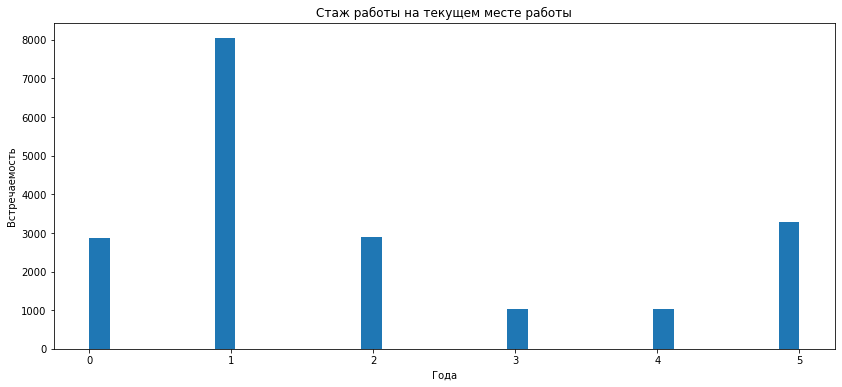

In [9]:
sns.distplot(df['job_years'], kde = False, hist_kws = {"alpha": 1})
plt.title('Стаж работы на текущем месте работы')
plt.xlabel('Года')
plt.ylabel('Встречаемость')
plt.show()

Вывод: большинство кандидатов работают на текущем месте работы не более 2-3 лет.

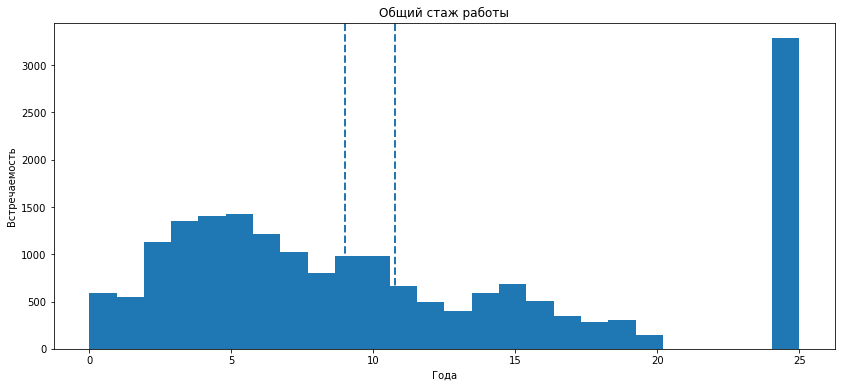

In [10]:
sns.distplot(df['exp_years'], kde = False, hist_kws = {"alpha": 1}, bins=26)
plt.title('Общий стаж работы')
plt.xlabel('Года')
plt.ylabel('Встречаемость')
plt.axvline(x = df['exp_years'].median(), linewidth = 2, linestyle = '--')
plt.axvline(x = df['exp_years'].mean(), linewidth = 2, linestyle = '--')
plt.show()

In [11]:
df[df['exp_years'] == 25]['exp_years'].count() / df['exp_years'].count()

0.1715210355987055

Вывод: в среднем по рынку кандидаты работают в области примерно 10 лет. Из-за недостатка данных нет возможности сделать вывод о характере распределения на стаже более 20 лет, но процент кандидатов со стажем более 20 лет в области очень высок.

#### 2.3. Есть ли зависимость между типом образования и средним количеством часов, потраченных на обучение?

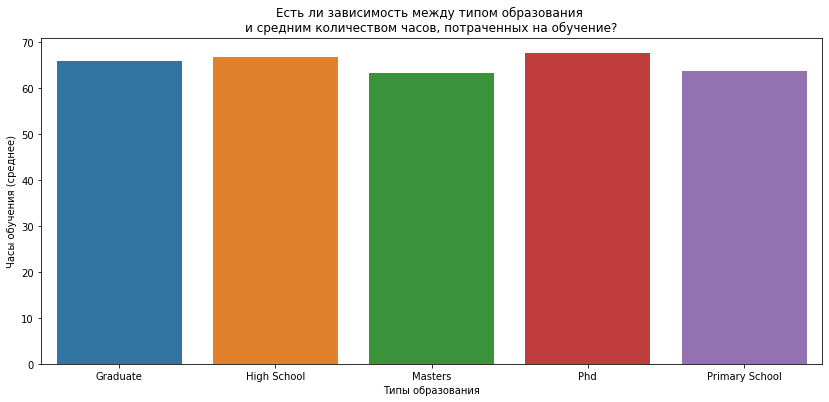

In [12]:
df_group = df.groupby('education_level')['training_hours'].mean().reset_index()
sns.barplot(data = df_group, x = 'education_level', y = 'training_hours')
plt.title('Есть ли зависимость между типом образования \nи средним количеством часов, потраченных на обучение?')
plt.xlabel('Типы образования')
plt.ylabel('Часы обучения (среднее)')
plt.show()

Вывод: кандидаты с разным образованием подходят к обучающим курсам с одинаковой степенью ответственности.

### 3. Датасет Happyness 2019

Источник: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

Большинство данных числовые.

In [13]:
df2 = pd.read_csv('2019.csv')
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 4. Графики (4-6)

#### 4.1. Распределение уровня счастья в целом

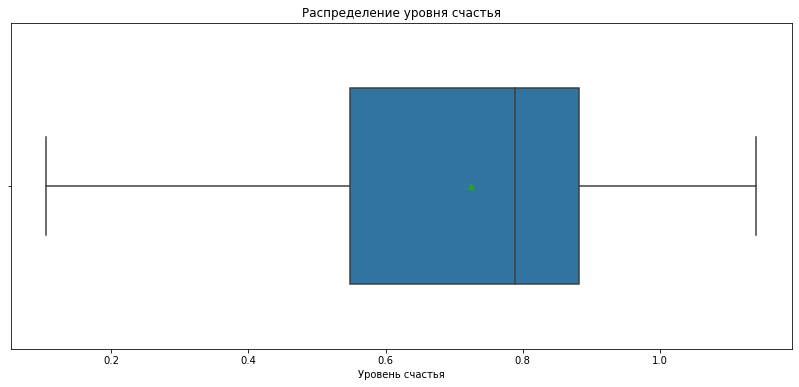

In [14]:
sns.boxplot(data = df2, x = 'Healthy life expectancy', width = 0.6, showmeans = True, showfliers = False)
plt.title('Распределение уровня счастья')
plt.xlabel('Уровень счастья')
plt.show()

Вывод: 
 - распределение уровня счастья по странам смещено в сторону высокого уровня
 - 50% стран имеют очень высокий уровень счастья - более 0,8
 - средний уровень счастья также высок - выше 0,7
 - 25% стран имеют низкий уровень счастья - ниже 0,5

#### 4.2. Простое сравнение параметров и уровня счастья

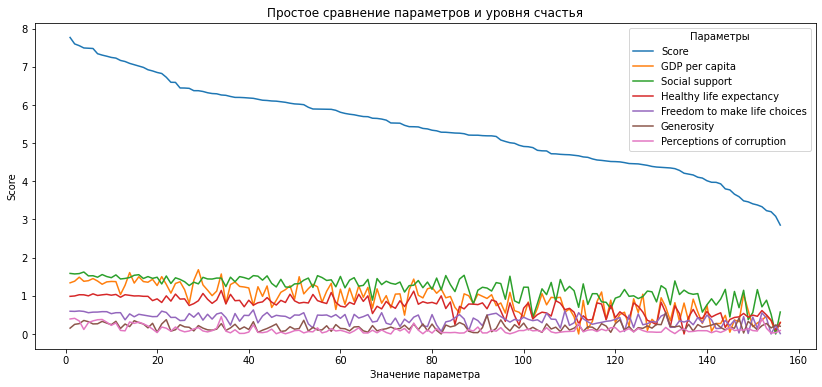

In [15]:
cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
       'Perceptions of corruption']

plt.title('Простое сравнение параметров и уровня счастья')
plt.xlabel('Страны')
plt.xlabel('Значение параметра')
for col in cols:
    sns.lineplot(data = df2, x = 'Overall rank', y = col, ci = None, label = col)
plt.legend(title='Параметры')
plt.show()

Вывод: кажется, что все параметры кроме 'Score' коррелируют с уровнем счастья. Но вообще ничего не понятно - линии накладываются друг на друга, имеют разные ранги значений и в принципе выводить такой график просто по странам - странное решение.

#### 4.3. Зависимость уровня счастья от параметров

Зависимость уровня счастья от параметров


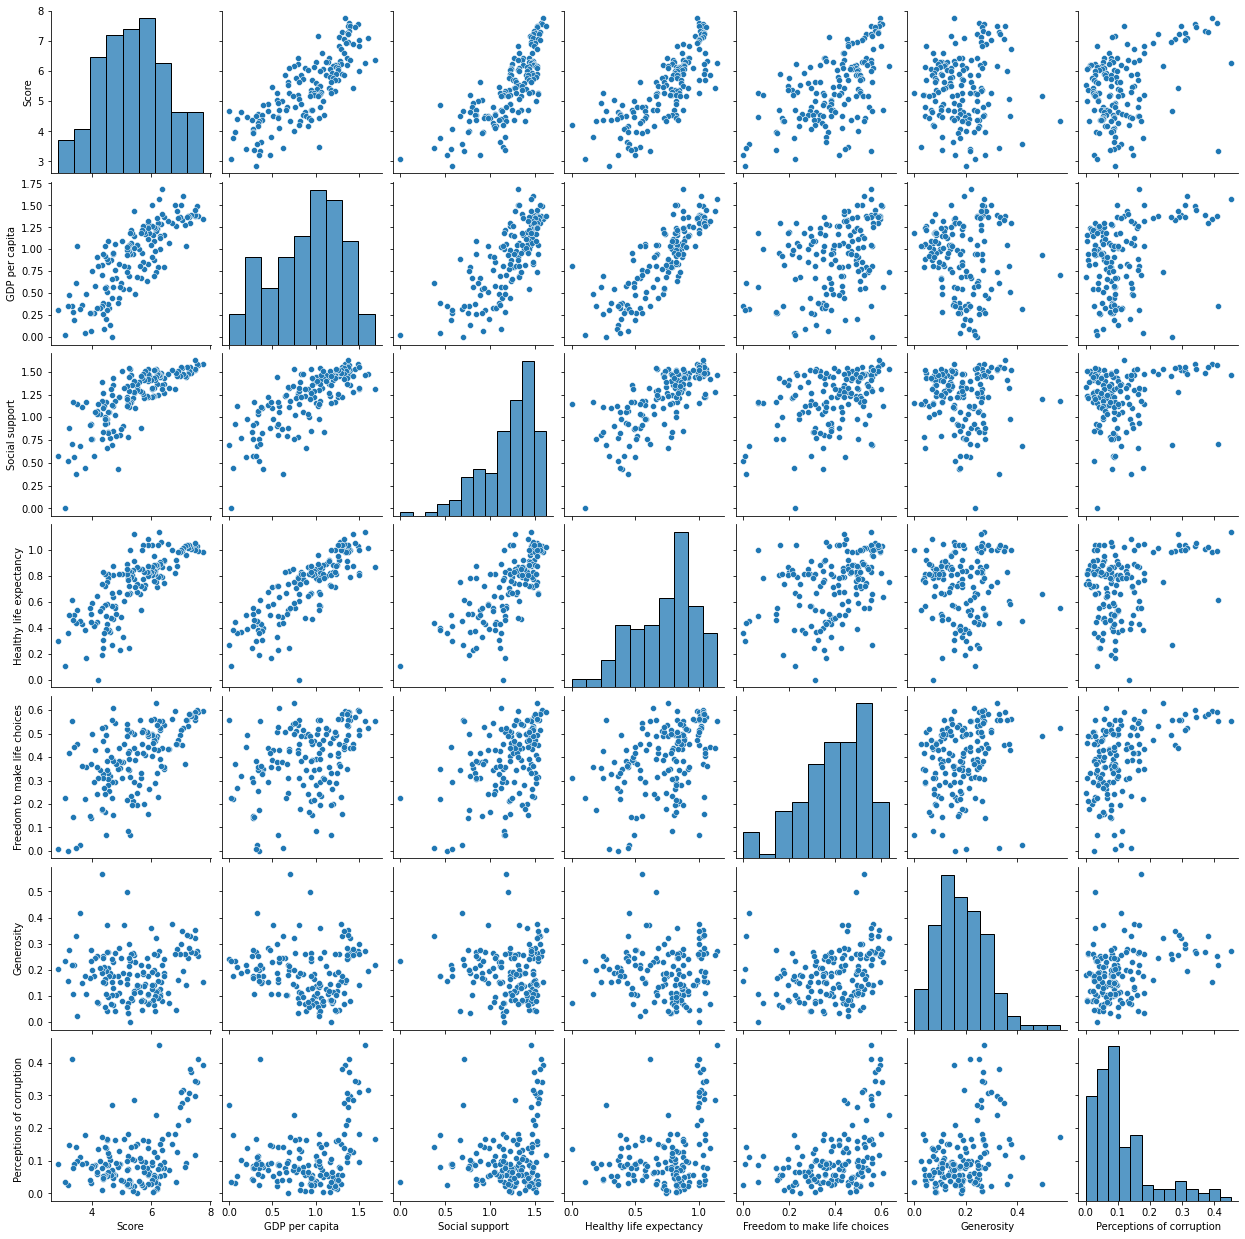

In [16]:
print('Зависимость уровня счастья от параметров')
sns.pairplot(df2[cols])
plt.show()

На таком графике представлены уже корректные графики зависимости уровня счастья от параметров.

Дополнительно посчитаем коэффициенты корреляции:

In [17]:
df2[cols].corr().style.bar(align='mid', color='green')

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Вывод:
 - высокая корреляция уровня счастья и параметров: 'Score', 'GDP per capita', 'Social support'.
 - низкая корреляция уровня счастья и параметров: 'Freedom to make life choices', 'Perceptions of corruption'.
 - нет корреляции уровня счастья и параметра 'Generosity'.